## _**GradientFlow demo**_

#### I. Importing Libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
%matplotlib inline

In [2]:
from gradientflow.core import Value, Neuron, Layer, MLP

MLP of [Layer of [ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2)], Layer of [ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16)], Layer of [ReLU Neuron(16)]]
number of parameters 337


#### II. Creating Dataset

In [3]:
np.random.seed(1337)
random.seed(1337)

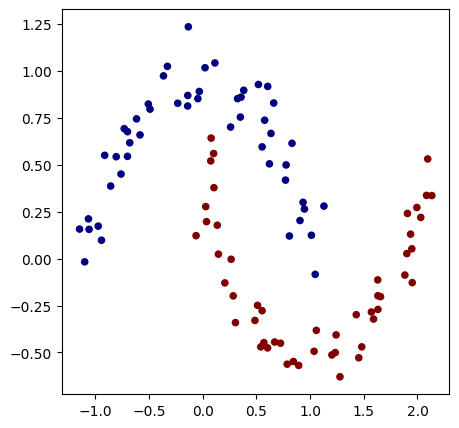

In [18]:
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1 # make y be -1 or 1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

#### III. Initializing a model

In [19]:
# initialize a model 
model = MLP(2, [16, 16, 1], 'T') # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2)], Layer of [Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16)], Layer of [Tanh Neuron(16)]]
number of parameters 337


#### IV. Training a model

In [20]:
# loss function
def loss(batch_size=None):
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.9552056867906323) 0.61


In [21]:
# optimization
for k in range(500):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")
    if acc == 1:
        break

step 0 loss 0.9552056867906323, accuracy 61.0%
step 1 loss 0.46987188894827725, accuracy 78.0%
step 2 loss 0.3992620353965036, accuracy 80.0%
step 3 loss 0.35366029377205216, accuracy 83.0%
step 4 loss 0.32006963357646095, accuracy 87.0%
step 5 loss 0.297727237979926, accuracy 86.0%
step 6 loss 0.2854967160017621, accuracy 87.0%
step 7 loss 0.28068487477435355, accuracy 88.0%
step 8 loss 0.2847216896766607, accuracy 87.0%
step 9 loss 0.30532537242160046, accuracy 85.0%
step 10 loss 0.2579549120808859, accuracy 89.0%
step 11 loss 0.25413952596460554, accuracy 89.0%
step 12 loss 0.25235882531699755, accuracy 89.0%
step 13 loss 0.2540224929281995, accuracy 88.0%
step 14 loss 0.26642328869353027, accuracy 87.0%
step 15 loss 0.23775235668554945, accuracy 90.0%
step 16 loss 0.2417697047966594, accuracy 90.0%
step 17 loss 0.23253204542189043, accuracy 90.0%
step 18 loss 0.24453101044023068, accuracy 89.0%
step 19 loss 0.20564448201904814, accuracy 92.0%
step 20 loss 0.19860743190236588, accur

#### V. Visualizing output decision boundary

(-1.6294151292547427, 2.1205848707452573)

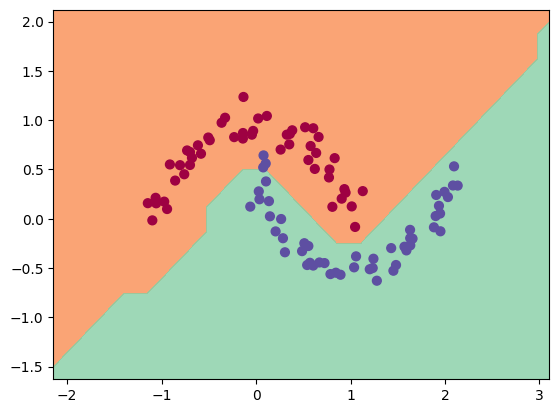

In [22]:
# visualize decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
